<a href="https://colab.research.google.com/github/duongtrung/Pytorch-tutorials/blob/main/14_pytorch_multivariate_timeseries_forecasting_LSTM_up.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> 

In [1]:
# dataset: https://finance.yahoo.com/quote/GE/history/
# I select Max in the Time Period

In [8]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [9]:
df = pd.read_csv("data/GE.csv")

In [10]:
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,1962-01-02,6.009615,6.109776,5.949519,5.989583,1.008423,269568
1,1962-01-03,5.959535,5.959535,5.909455,5.929487,0.998304,184704
2,1962-01-04,5.929487,5.979567,5.809295,5.859375,0.986500,229632
3,1962-01-05,5.859375,5.869391,5.608974,5.709135,0.961206,340704
4,1962-01-08,5.709135,5.709135,5.528846,5.699119,0.959519,386880


In [11]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,15311.000000,15311.000000,15311.000000,15311.000000,15311.000000,1.531100e+04
mean,97.070211,98.100657,95.977638,97.055038,63.951951,3.182796e+06
std,104.719770,105.865094,103.520682,104.724933,71.228512,4.296419e+06
min,4.447115,4.517228,4.346955,4.447115,0.759389,0.000000e+00
25%,8.954327,9.024439,8.874199,8.954327,2.239390,6.564480e+05
50%,49.118591,49.519230,48.637821,49.038464,22.832689,1.857336e+06
75%,180.346153,182.076920,178.493584,179.983979,120.933494,3.867780e+06
max,458.173065,465.384613,457.211548,461.538452,255.183044,9.787757e+07


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15311 entries, 0 to 15310
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       15311 non-null  object 
 1   Open       15311 non-null  float64
 2   High       15311 non-null  float64
 3   Low        15311 non-null  float64
 4   Close      15311 non-null  float64
 5   Adj Close  15311 non-null  float64
 6   Volume     15311 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 837.4+ KB


In [13]:
# separate dates for future plotting
train_dates = pd.to_datetime(df['Date'])

In [14]:
train_dates.head(5)

0   1962-01-02
1   1962-01-03
2   1962-01-04
3   1962-01-05
4   1962-01-08
Name: Date, dtype: datetime64[ns]

In [17]:
# variables for training
cols = list(df)[1:6] # ['Open', 'High', 'Low', 'Close', 'Adj Close']

In [18]:
df_for_training = df[cols].astype(float)

<AxesSubplot:>

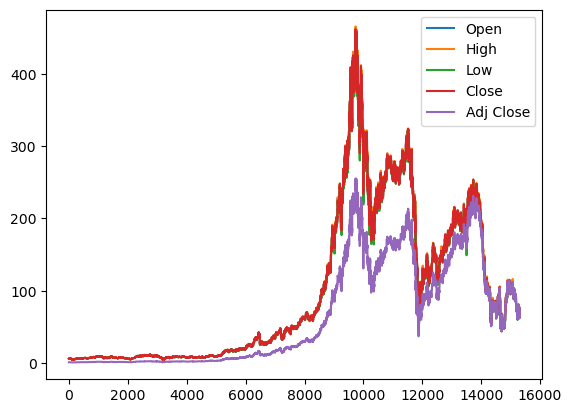

In [19]:
df_for_training.plot.line()

In [20]:
scaler = StandardScaler()
scaler = scaler.fit(df_for_training)
df_for_training_scaled = scaler.transform(df_for_training)

In [23]:
df_for_training_scaled.shape # (15311, 5)

(15311, 5)